In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def figSize(wx,wy):
    matplotlib.rcParams['figure.figsize'] = (wx, wy)
import seaborn as sns

# Simple Dataframes

In [2]:
WINE_DATA="winemag-data_first150k.csv"

In [8]:
df_wine = pd.read_csv(WINE_DATA, header=0, index_col=0)

In [11]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [5]:
#!pip install qgrid
import qgrid

In [6]:
widget = qgrid.show_grid(df_wine, show_toolbar=True)
widget

A Jupyter Widget

### What is varience of the rating and price?

In [13]:
df_wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


### What is the correlation between points and price?

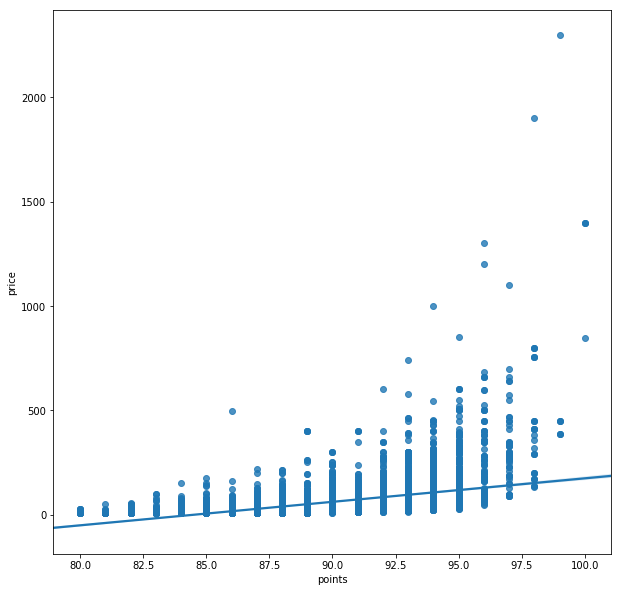

In [21]:
figSize(10, 10)
sns.regplot("points", "price", data=df_wine[df_wine["country"]=="France"])

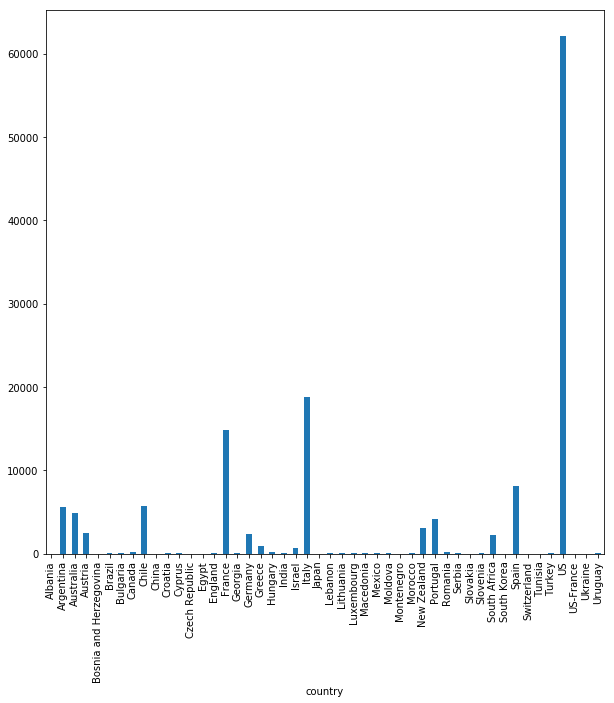

In [25]:
df_wine.groupby("country")["price"].count().plot.bar()

### What are best 10 wines cheaper than 10 USD?

### How data is distributed between countries?

### Which wine is the best in each price category?

In [26]:
from sklearn.cluster import KMeans
import numpy as np

In [31]:
df_wine.price.fillna(0).values.reshape(-1,1)

array([  235.,   110.,    90.,    65.,    66.,    73.,    60.,    80.,
          48.,   185.,   325.,   290.,    75.,    24.,    79.,   220.,
          45.,    57.,    62.,   105.,    15.,    37.,    nan,    22.,
          42.,   135.,    29.,    23.,    17.,    26.,    55.,    39.,
          69.,    30.,    50.,    40.,   100.,    68.,    28.,    18.,
          25.,    36.,    38.,    85.,    19.,    54.,    59.,    10.,
          12.,    13.,    14.,    20.,   125.,     7.,    49.,    93.,
          32.,    16.,    21.,    44.,    35.,    61.,    34.,    11.,
          58.,   120.,    41.,   200.,    43.,     9.,    56.,    46.,
          92.,    94.,    27.,    95.,    33.,    70.,   155.,    63.,
         130.,   115.,    31.,    98.,    52.,    64.,    91.,   111.,
          88.,    74.,    77.,    87.,   113.,   140.,   500.,    51.,
         150.,   240.,    72.,   103.,     8.,   136.,   141.,   102.,
          47.,    53.,    96.,    78.,   149.,   138.,   117.,     4.,
      

In [32]:
X = df_wine.price.fillna(0).values.reshape(-1,1)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
df_wine["price_unsorted_cat"] = kmeans.labels_

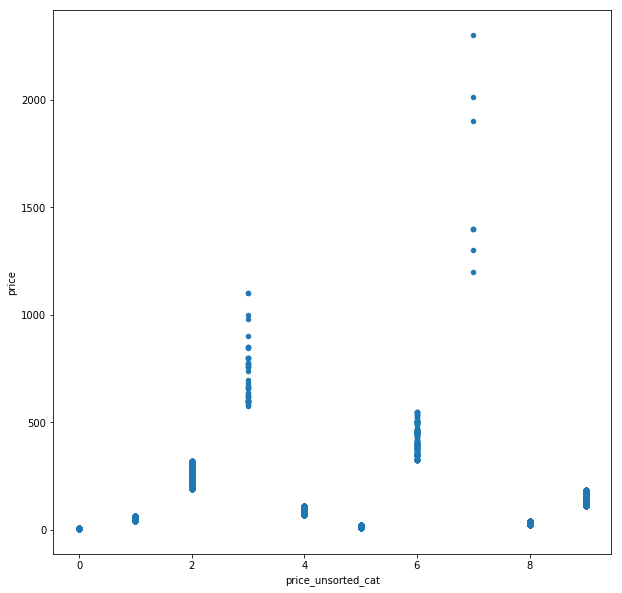

In [38]:
df_wine.plot.scatter("price_unsorted_cat", "price")

In [36]:
df_wine["aaa"] = df_wine.points * df_wine.price

In [37]:
df_wine[["points", "price"]]

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0
5,95,73.0
6,95,65.0
7,95,110.0
8,95,65.0
9,95,60.0


In [41]:
df_wine.groupby("price_unsorted_cat")["price"].mean().sort_values()

price_unsorted_cat
0       7.387189
5      15.798228
8      31.013594
1      51.739292
4      83.023432
9     138.119921
2     237.983607
6     411.566820
3     723.040816
7    1614.125000
Name: price, dtype: float64

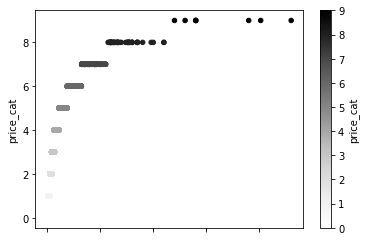

In [65]:
cluster_order = df_wine.groupby("price_unsorted_cat")["price"].mean().sort_values().index.values
mapping = {np.NaN: 0}
for i in range(len(cluster_order)):
    mapping[cluster_order[i]] = i
    
df_wine["price_cat"] = df_wine["price_unsorted_cat"].apply(lambda row: mapping[row])

df_wine.plot.scatter("price", "price_cat", c="price_cat")

In [90]:
df_wine.iloc[df_wine.groupby("price_cat")["price"].nsmallest(3).index.levels[1].values].sort_values("price")

,country,description,designation,points,price,province,region_1,region_2,variety,winery,price_cat,price_unsorted_cat
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties,0,0
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,0,0
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal,0,0
247,Romania,"This playful pink has fun aromas of cinnamon, ...",La Umbra,88,9.0,Colinele Dobrogei,NaN,NaN,Rosé,Cramele Halewood,1,5
730,Italy,This informal red has a shy nose that eventual...,NaN,85,9.0,Northeastern Italy,Delle Venezie,NaN,Pinot Nero,Famiglia Cielo,1,5
726,France,This pale rosé blend of Cabernet Sauvignon and...,Bélingard,85,9.0,Southwest France,Bergerac Rosé,NaN,Rosé,Château Bélingard,1,5
20,US,Heitz has made this stellar rosé from the rare...,Grignolino,95,24.0,California,Napa Valley,Napa,Rosé,Heitz,2,8
100,US,"Juicy kiwi, lime blossom and sour apple candy ...",NaN,86,24.0,California,South Coast,South Coast,Viognier,Hawk Watch Winery,2,8
144,US,"Clean, sharp and zesty fruit blossom aromas me...",Jespersen Ranch,90,24.0,California,Edna Valley,Central Coast,Albariño,Stephen Ross,2,8
34,US,"The aromas entice with notes of wet stone, hon...",Conner Lee Vineyard,90,42.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Buty,3,1


In [7]:
df_wine[df_wine["country"]=="France"].sample(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
100689,France,"Lightly perfumed, the wine then shows elegant ...",Prestige,90,25.0,Southwest France,Cahors,NaN,Malbec,Château Haut-Monplaisir
28017,France,"With the palest pink color, this crisp wine is...",Prestige Premier Cru Brut Rosé,90,NaN,Champagne,Champagne,NaN,Champagne Blend,Duval-Leroy
70531,France,"A rustic wine, with definite barnyard flavors....",Prestige,92,19.0,Bordeaux,Fronsac,NaN,Bordeaux-style Red Blend,Château les Tonnelles


In [22]:
df_wine[df_wine["country"]=="France"]["province"].unique()

array(['Provence', 'Southwest France', 'France Other', 'Rhône Valley',
       'Burgundy', 'Loire Valley', 'Champagne', 'Languedoc-Roussillon',
       'Bordeaux', 'Alsace', 'Beaujolais'], dtype=object)

In [28]:
df_wine[df_wine["country"]=="France"].groupby("province")["country"].count()

province
Alsace                  1680
Beaujolais               532
Bordeaux                6111
Burgundy                4308
Champagne               1370
France Other             289
Languedoc-Roussillon    1082
Loire Valley            1786
Provence                1021
Rhône Valley            1318
Southwest France        1601
Name: country, dtype: int64

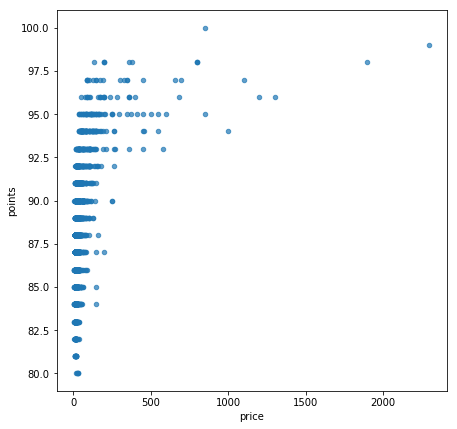

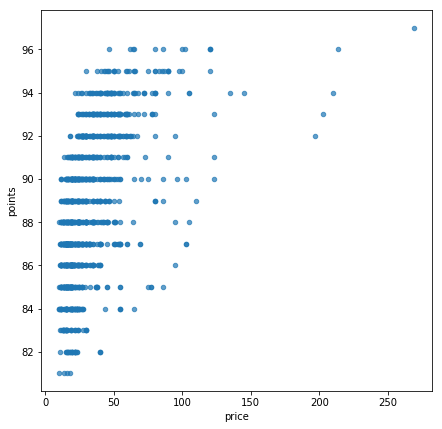

In [29]:
figSize(7,7)
df_wine.query("country == 'France' and province == 'Bordeaux'").plot.scatter("price", "points", alpha=0.7)
df_wine.query("country == 'France' and province == 'Alsace'").plot.scatter("price", "points", alpha=0.7)

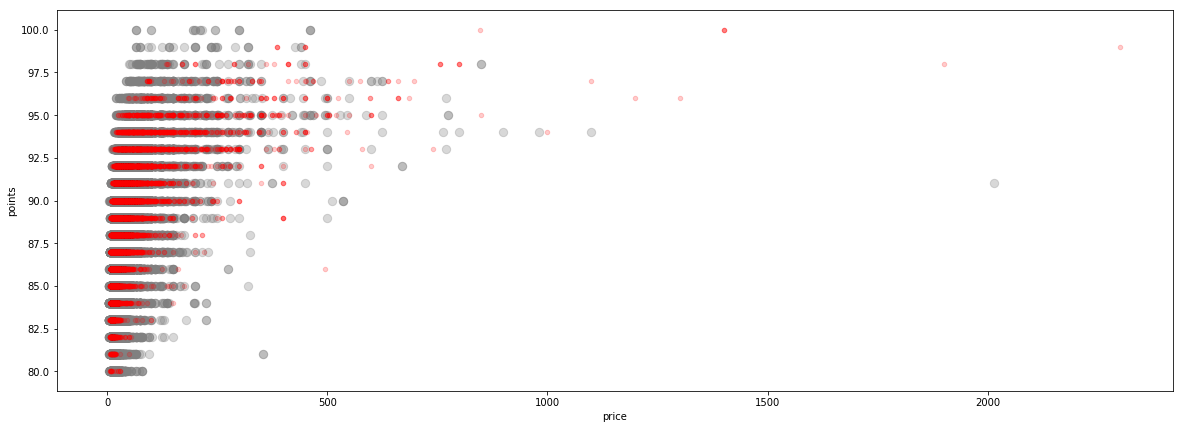

In [89]:
figSize(20,7)
ax = sns.regplot("price", "points", data=df_wine[~(df_wine["country"] == "France")], 
                fit_reg=False, scatter_kws={'color': 'gray', "alpha": 0.3, "s": 70})
sns.regplot("price", "points", data=df_wine[(df_wine["country"] == "France")], 
                fit_reg=False, scatter_kws={'color': 'red', "alpha": 0.2, "s": 20}, ax=ax)

In [9]:
df_wine[["country", "price"]].sample(3)

,country,price
52966,Spain,40.0
92873,Chile,15.0
140534,Germany,10.0
